<a href="https://colab.research.google.com/github/jirayuwat12/SuperAI/blob/master/Introduction_to_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution



1. sobel edge detection
![2 filter Gx Gy](https://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/sobmasks.gif)
1. gaussian blur
1. Difference of gaussian ( DoG )
1. Gabor : *good for finger frint*

# Image gradient



1. greyscale image = I(x,y)
  - sobel = gradient in x and y direction
1. Histogram of oriented Gradient ( HOG )
  - discretize orientation into bins
  - HOG descriptor = concatenate HOG on connected bloacks
  - Rotation invariant by subtracting main orientation of the "keypoint"
    - Keypoint ~ corner

# Basic Image processing

## download resource

In [3]:
!gdown --id 1eDwuwKsUUxuzLl1iW2YxenaIscyvQvLv
!unzip -q image-pre-resource.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1eDwuwKsUUxuzLl1iW2YxenaIscyvQvLv
To: /content/image-pre-resource.zip
100% 7.71M/7.71M [00:00<00:00, 119MB/s]
replace cat_trim.mp4? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


##import lib

In [12]:
#cv2
import cv2
from google.colab.patches import cv2_imshow

#matplotlib
from matplotlib import pyplot as plt


## read and show img

In [5]:
img = cv2.imread('cat1.jpeg')

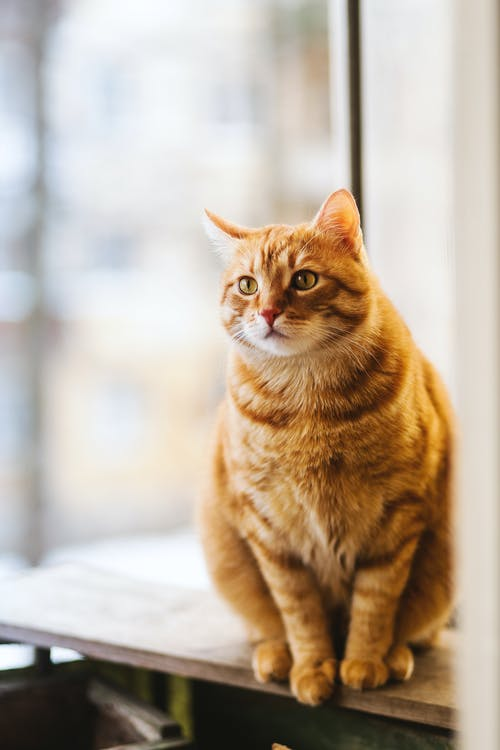

In [8]:
cv2_imshow(img)

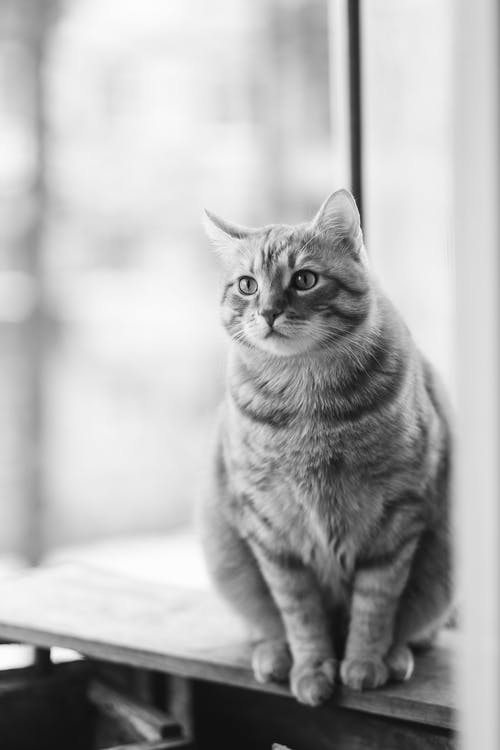

In [10]:
# read as grey scale
img = cv2.imread('cat1.jpeg',0)
cv2_imshow(img)

In [11]:
img.shape,img.dtype

((750, 500), dtype('uint8'))

##Show image via matplotlib

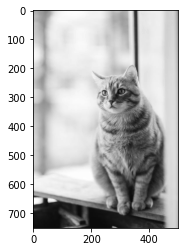

In [14]:
plt.gray()
plt.imshow(img)

## work with color image

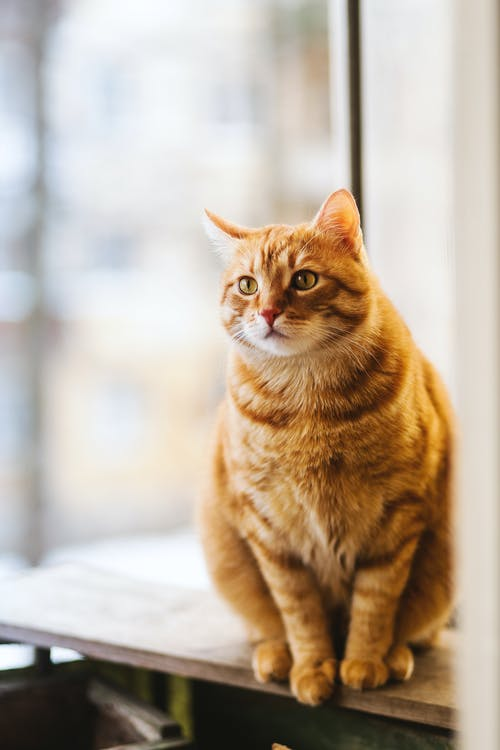

In [21]:
img_BGR = cv2.imread('cat1.jpeg')
cv2_imshow(img_BGR)

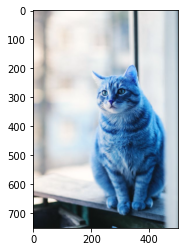

In [23]:
plt.imshow(img_BGR)

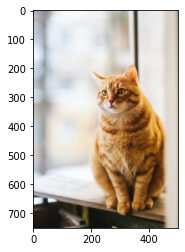

In [24]:
img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)

##work with image

###save

In [25]:
cv2.imwrite('cat_write.png',img_RGB)

True

In [26]:
!ls | grep cat_write

cat_write.png


### resize

In [27]:
img.shape

(750, 500, 3)

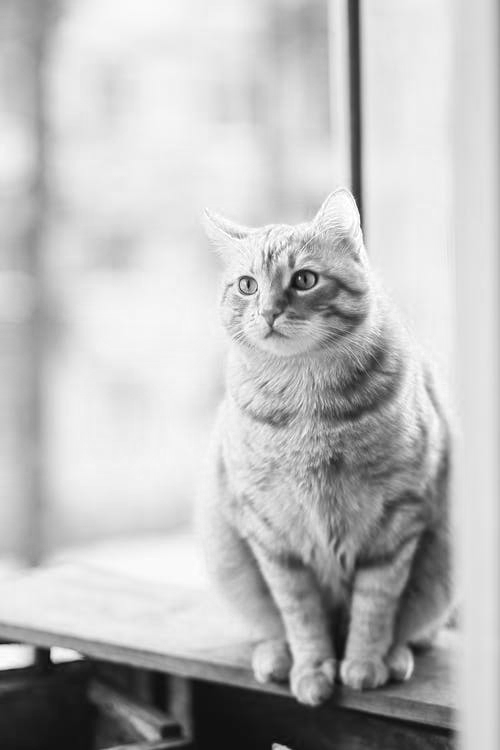

In [35]:
cv2_imshow(img[:,:,2])

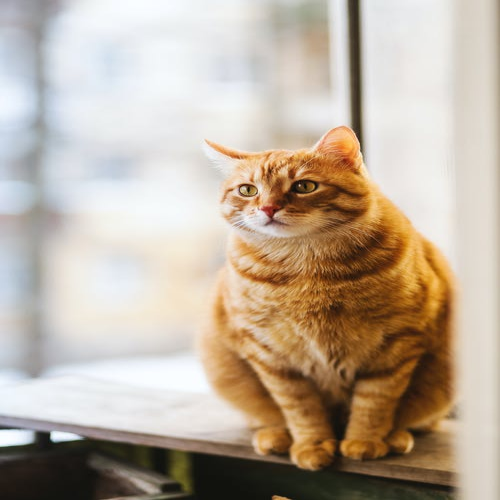

In [37]:
img_500_500 = cv2.resize(img,(500,500))
cv2_imshow(img_500_500)

In [38]:
img_500_500.shape

(500, 500, 3)

### rescale

In [40]:
img.shape

(750, 500, 3)

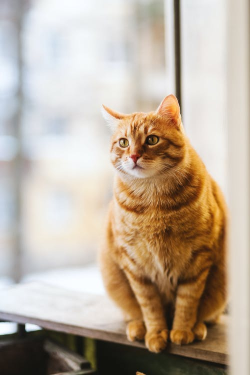

In [42]:
img2 = cv2.resize(img,(500//2,750//2))
cv2_imshow(img2)

In [43]:
img2.shape
#heigh width chanel

(375, 250, 3)

In [44]:
def rescale(image,scale= 0.5):
    width = int(image.shape[1] * scale)
    heigh = int(image.shape[0] * scale)
    return cv2.resize(image,(width,heigh))

In [45]:
img3 = rescale(img,0.5)
img3.shape

(375, 250, 3)

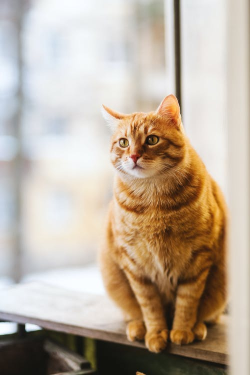

In [46]:
cv2_imshow(img3)

##Drawing shape

### paint color

In [47]:
import numpy as np

In [48]:
plane = np.zeros((500,500,3),dtype=np.uint8)

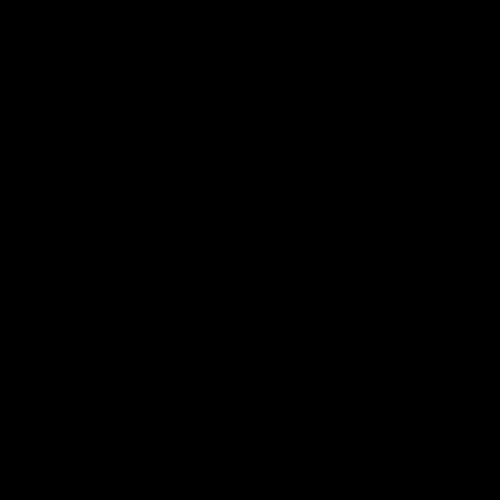

In [50]:
cv2_imshow(plane)

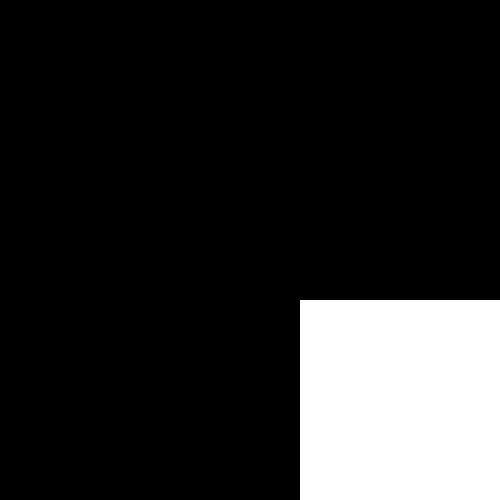

In [51]:
plane[300:,300:,:] = 255
cv2_imshow(plane)

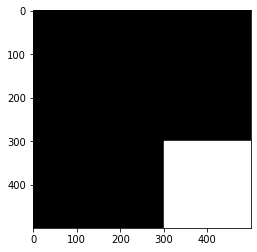

In [52]:
plt.imshow(plane)

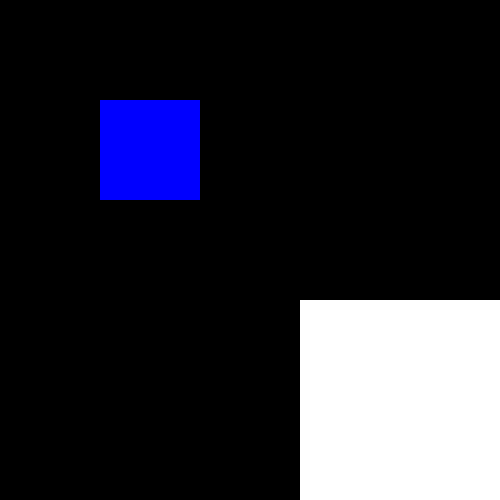

In [53]:
plane[100:200,100:200,0] = 255 # chanel = 0
cv2_imshow(plane) # chanel 0 = B

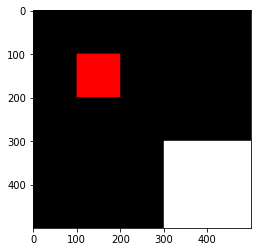

In [54]:
plt.imshow(plane)
# chanel 0 = R

### draw reg

In [55]:
plane = np.zeros((500,500,3),dtype = np.uint8)

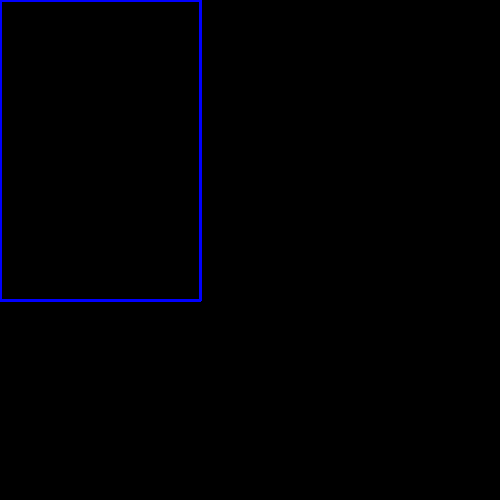

In [61]:
cv2.rectangle(plane,(0,0),(200,300),(255,0,0),thickness = 2)
cv2_imshow(plane)

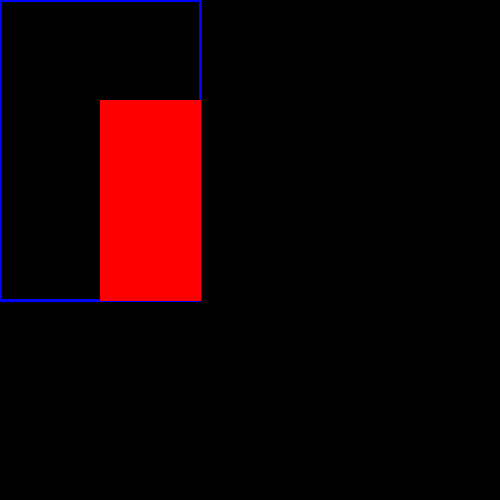

In [62]:
#fill color reg
cv2.rectangle(plane,(100,100),(200,300),(0,0,255),thickness = -1)
cv2_imshow(plane)

### draw circle

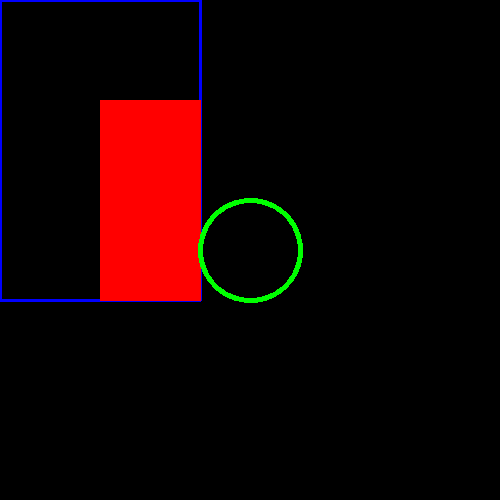

In [64]:
cv2.circle(plane,
           center = (plane.shape[1]//2,plane.shape[0]//2),
           radius = 50,
           color=(0,255,0),
           thickness = 4)
cv2_imshow(plane)

### draw line

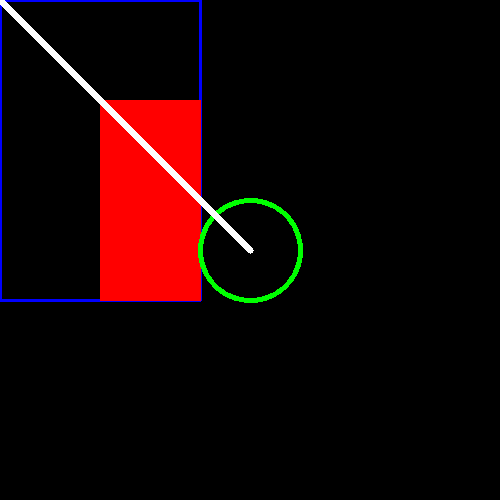

In [65]:
cv2.line(plane,(0,0),(250,250),(255,255,255),thickness = 5)
cv2_imshow(plane)

###write text

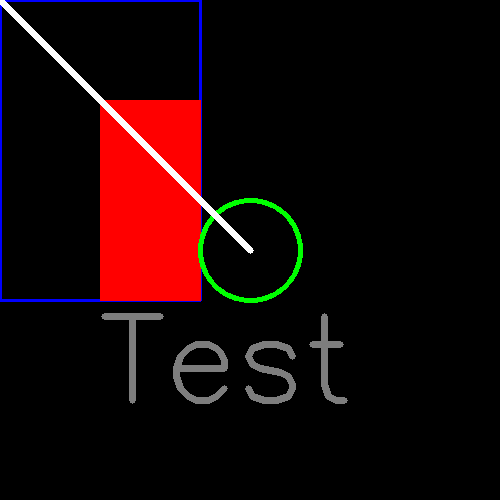

In [68]:
cv2.putText(plane,
            "Test",
            (100,400),
            cv2.FONT_ITALIC,
            4,
            (125,125,125),
            thickness = 6)
cv2_imshow(plane)

##Color Detection

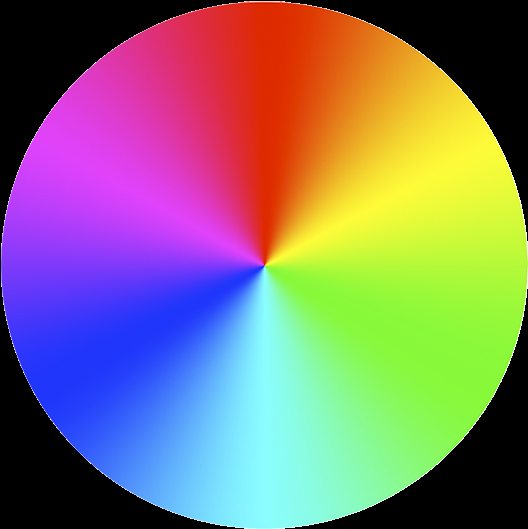

In [70]:
img = cv2.imread('colorwheel.png')
cv2_imshow(img)

In [71]:
img.shape

(529, 528, 3)

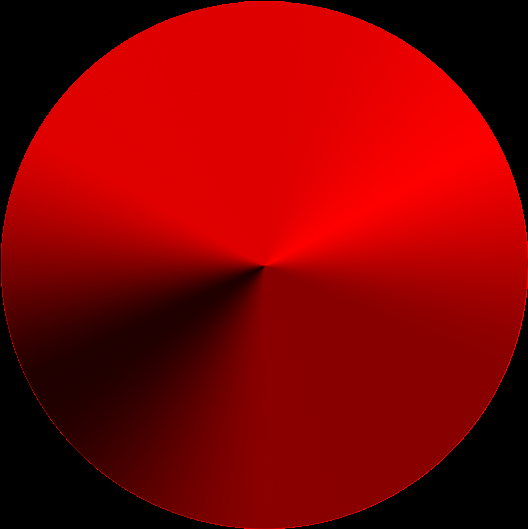

In [72]:
img_temp = img.copy()
img_temp[:,:,0:2] = 0
cv2_imshow(img_temp)

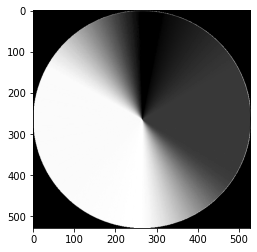

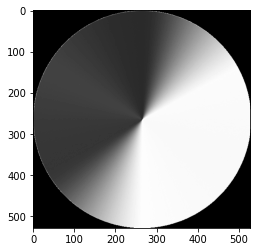

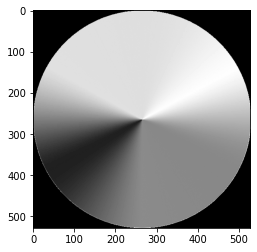

<Figure size 432x288 with 0 Axes>

In [74]:
plt.gray()
for i in range(3):
    plt.imshow(img[:,:,i])
    plt.figure()


In [75]:
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

In [77]:
img_hsv.shape

(529, 528, 3)

In [78]:
# blue tone
lower = np.array([110,50,50])
upper = np.array([130,255,255])

In [80]:
mask = cv2.inRange(img_hsv,lower,upper)

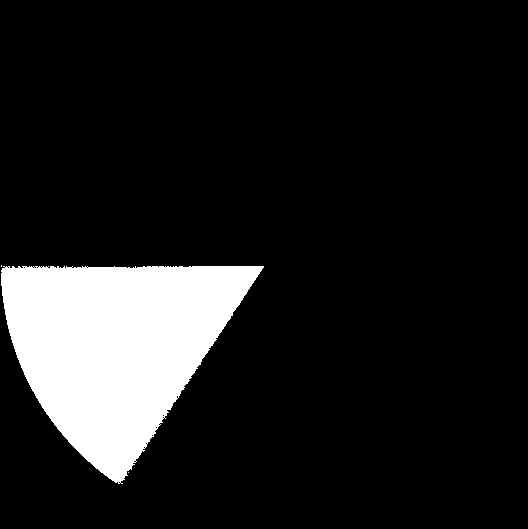

In [82]:
cv2_imshow(mask)

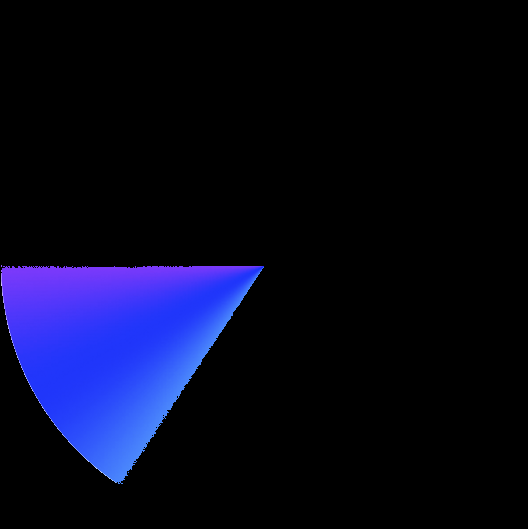

In [83]:
cv2_imshow(cv2.bitwise_and(img,img,mask=mask))

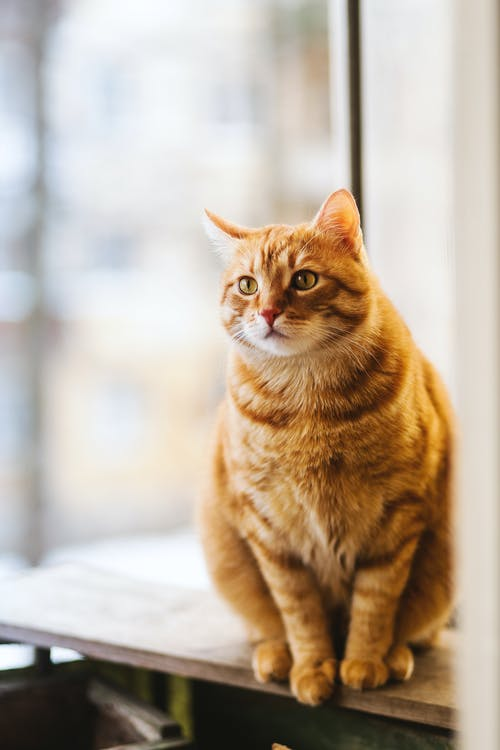

In [84]:
img = cv2.imread('cat1.jpeg')
cv2_imshow(img)

In [85]:
#convert to hsv
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

In [86]:
#orange tone
lower = np.array([10,75,75])
upper = np.array([20,255,255])

In [87]:
mask = cv2.inRange(img_hsv,lower,upper)

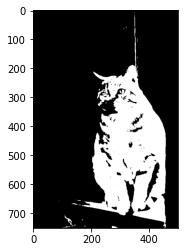

In [88]:
plt.imshow(mask)

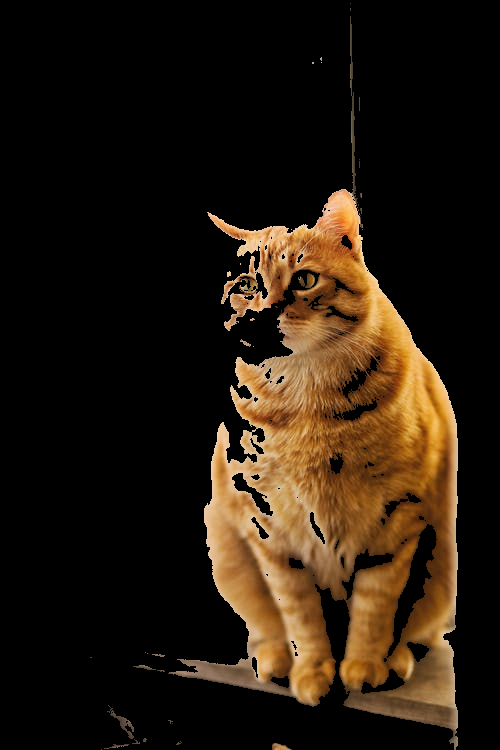

In [89]:
#filter
cv2_imshow(cv2.bitwise_and(img,img,mask=mask))

## Edge detection

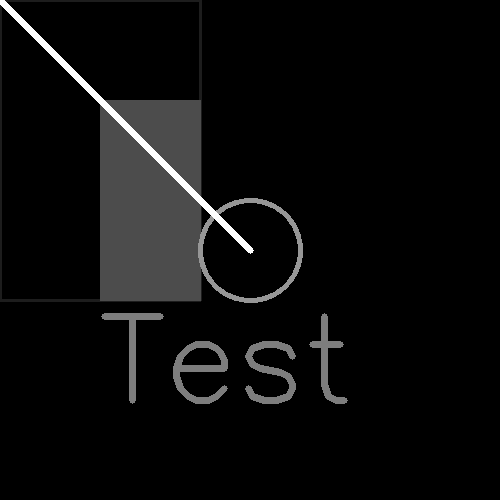

In [91]:
#convert to gray
plane_gray = cv2.cvtColor(plane,cv2.COLOR_BGR2GRAY)
cv2_imshow(plane_gray)

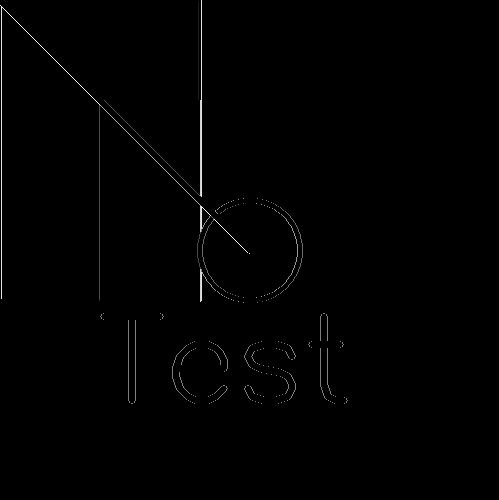

In [93]:
cv2_imshow(np.diff(plane_gray))

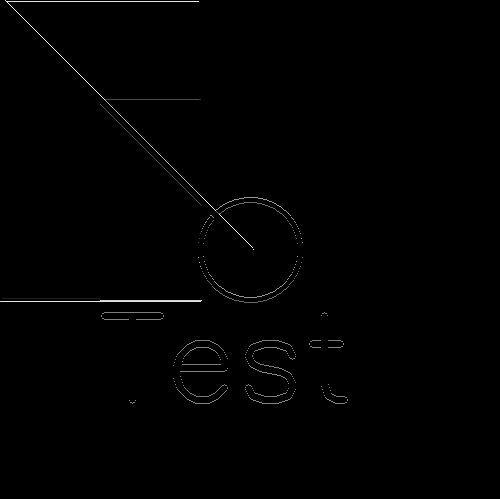

In [94]:
cv2_imshow(np.diff(plane_gray,axis = 0))

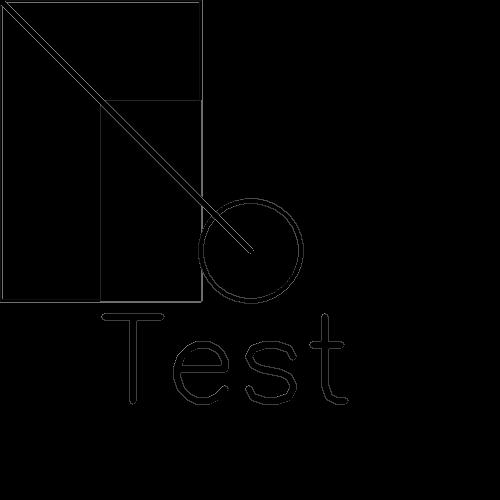

In [100]:
#sum diff x and diff y
x_diff = np.diff(plane_gray, prepend=plane_gray[0][0])
y_diff = np.diff(plane_gray, axis = 0, prepend=plane_gray[0][0])
edge = (x_diff+y_diff)/2
edge = np.abs(edge)
cv2_imshow(edge)

In [102]:
img = cv2.imread('cat1.jpeg',0)
img = rescale(img)

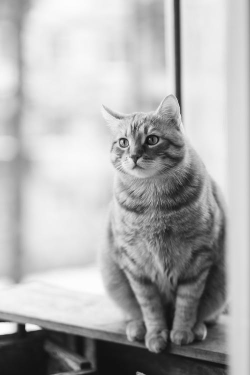

In [103]:
cv2_imshow(img)

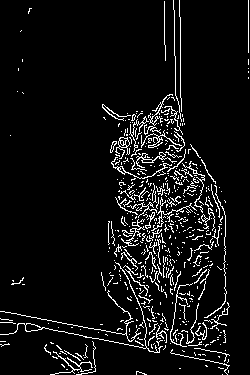

In [106]:
# function name canny in cv2 id finding edge
edge = cv2.Canny(img,100,100)
cv2_imshow(edge)

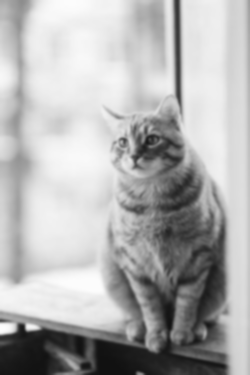

In [107]:
blur = cv2.GaussianBlur(img,(5,5),0)
cv2_imshow(blur)

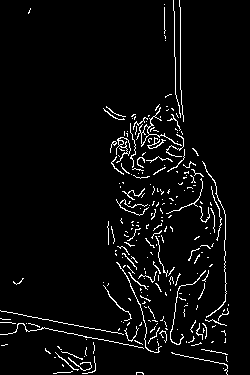

In [108]:
#make it blur can let we find edge clearer
edge = cv2.Canny(blur,100,100)
cv2_imshow(edge)

## convolution operation

In [109]:
from scipy.signal import convolve2d

In [113]:
image = np.array([
    [1,1,1,0,0],
    [0,1,1,1,0],
    [0,0,1,1,1],
    [0,0,1,1,0],
    [0,1,1,0,0]
])
image

array([[1, 1, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 1, 1],
       [0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0]])

In [114]:
#make kernel / filter
kernel = np.array([
    [1,0,1],
    [0,1,0],
    [1,0,1]
])
kernel

array([[1, 0, 1],
       [0, 1, 0],
       [1, 0, 1]])

In [115]:
cv2.filter2D(image.astype(float),ddepth=-1,kernel=kernel)

array([[5., 3., 5., 2., 4.],
       [2., 4., 3., 4., 2.],
       [2., 2., 4., 3., 5.],
       [2., 2., 3., 4., 2.],
       [0., 3., 3., 2., 4.]])

In [116]:
convolve2d(image,kernel) #full convolution

array([[1, 1, 2, 1, 1, 0, 0],
       [0, 2, 2, 3, 1, 1, 0],
       [1, 1, 4, 3, 4, 1, 1],
       [0, 1, 2, 4, 3, 3, 0],
       [0, 1, 2, 3, 4, 1, 1],
       [0, 0, 2, 2, 1, 1, 0],
       [0, 1, 1, 1, 1, 0, 0]])

In [117]:
convolve2d(image,kernel,mode='valid')

array([[4, 3, 4],
       [2, 4, 3],
       [2, 3, 4]])